## SSB30806: Modelling in Systems Biology

### Week 2, practical 1: Derivation of Michaelis-Menten kinetics
In this practical you will work on:
- Interpreting ODEs in a biological context;
- Constructing ODEs from chemical reaction schemes;
- Deriving dimensions of variables and parameters;
- Function manipulation;
- Calculating steady states;
- The derivation of the Michaelis-Menten kinetics / functional responses;
- Eye-ball fitting of an equation to data;
- Generally interpreting modelling results in a biological context.

Solutions will be made available on Brightspace.

### HOLLING’S DISC EQUATION AND SOME CLASSIC EXPERIMENTS
Crawford Stanley ‘Buzz’ Holling (1930-2019) was one of the conceptual founders of economic ecology. In 1959 he published one of his classic papers, ‘The components of Predation as Revealed by a Study of Small-Mammal Predation of the European Pine Sawfly’ (The Canadian Entomologist (1959), p. 293-320) on the topic of how population numbers are kept in check as a result of environmental limitations to the capacity of the population to increase. Based on several experiments with animals in the wild, in his paper he sketched four types of so-called ‘functional responses’, numbered types I through IV. The Michaelis-Menten kinetics correspond to the proposed type II functional response. In a different laboratory experiment, human subjects gathered discs that represented ‘prey’, which resulted in a similar response type, leading to the canonical name ‘disc equation’ for the type II functional response.

The disc equation was given by Holling (1959) as:

\begin{equation}
N_a = \frac{cTN}{1+cbN}
\label{eq:Holling} \tag{1}
\end{equation}

Here $N_a$ is the number of picked up discs by a single collector, $N$ is the number or density of available discs (where we implicitly assume that removed discs are immediately replaced to keep the density constant), and $T$ is the time of the experiment.

### Question 1:
Give biological interpretations of parameters  and  and their dimensions.

*   **Parameter $c$**: This parameter represents the **instantaneous attack rate** or the **rate of successful encounters** between the predator and prey per unit of searching time. It describes how effectively a predator finds and attacks prey when searching. Its dimension is **[Time]$^{-1}$ [Area]** (or **[Time]$^{-1}$ [Number]$^{-1}$** if considering number instead of density).

*   **Parameter $b$**: This parameter represents the **handling time** per prey item. It's the time a predator spends processing a single prey item after capturing it (e.g., subduing, consuming, and digesting). Its dimension is **[Time] [Area]** (or **[Time]** if considering number instead of density).

We can interpret discs as prey, and the picking up of discs as predation, so that  has the interpretation of number of attacked prey by a single predator. In one experiment single spined soldier bugs (*Podisus maculiventris*) were placed in petri dishes with different numbers of larvae of the Mexican bean beetle (*Epilachna varivestis*). The data of this experiment are given in the below table (Wiedenmann & O’Neil, 1991).

| No. of prey | Median number attacked in 24h | Mean number attacked in 1h | Mean number attacked in 24h | SEM / mean ratio per 24h |
| :- | :- | :- | :- | :- |
| 1  | 1   | -         | 1.0 (0.0) | 0.00 |
| 2  | 2   | -         | 2.0 (0.0) | 0.00 |
| 4  | 4   | 0.7 (0.2) | 3.2 (0.5) | 0.16 |
| 8  | 7   | 1.2 (0.2) | 6.6 (0.3) | 0.05 |
| 12 | 10  | 1.4 (0.2) | 8.4 (1.0) | 0.12 |
| 16 | 9.5 | 1.0 (0.1) | 9.0 (1.0) | 0.11 |


### Question 2:
Plot the fourth column (mean number attacked in 24 hours) – we call this $N_a$ – as a function of the first column (no. of prey) – which we will call $N$. Describe what you see, and provide a biological explanation.

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2409241049.py:17: SyntaxWarning: invalid escape sequence '\d'
  df['Mean attacked 24h'] = df['Mean attacked 24h'].astype(str).str.extract('(\d+\.?\d*)').astype(float)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


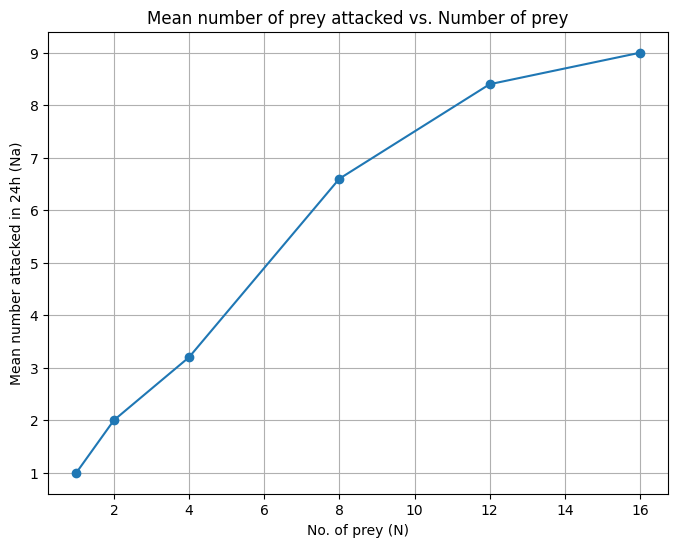

Description of the plot:
The plot shows that as the number of prey increases, the mean number attacked in 24 hours also increases, but the rate of increase slows down as the number of prey gets higher. This suggests a saturating effect, where the predator's attack rate is limited by handling time or other factors at higher prey densities. This shape is characteristic of a Type II functional response.


In [15]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import io
import matplotlib.pyplot as plt # Import matplotlib.pyplot

# Data from the table
data = '/content/drive/My Drive/WUR/Modeling in Systems Biology/week_2/2-2 week2 practical Tuesday data.xlsx'

# Read the data into a pandas DataFrame, skipping the markdown formatting lines
df = pd.read_excel(data)

# Extract the relevant columns for plotting and convert to numeric, handling potential errors
df['No. of prey'] = pd.to_numeric(df['No. of prey'], errors='coerce')
# Extract the numeric part from the 'Mean attacked 24h' column and convert to numeric
df['Mean attacked 24h'] = df['Mean attacked 24h'].astype(str).str.extract('(\d+\.?\d*)').astype(float)


# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(df['No. of prey'], df['Mean attacked 24h'], marker='o', linestyle='-')
plt.xlabel('No. of prey (N)')
plt.ylabel('Mean number attacked in 24h (Na)')
plt.title('Mean number of prey attacked vs. Number of prey')
plt.grid(True)
plt.show()

print("Description of the plot:")
print("The plot shows that as the number of prey increases, the mean number attacked in 24 hours also increases, but the rate of increase slows down as the number of prey gets higher. This suggests a saturating effect, where the predator's attack rate is limited by handling time or other factors at higher prey densities. This shape is characteristic of a Type II functional response.")

### Question 3:
Determine the dimensions of $N_a$, $N$, $T$, $c$, and $b$.

**Question 3: Determine the dimensions of $N_a$, $N$, $T$, $c$, and $b$.**

Based on the equation $N_a = \frac{cTN}{1+cbN}$ and considering $N_a$ and $N$ as numbers ([Number]) and $T$ as time ([Time]):

*   $N_a$: The number of attacked prey. Dimension: **[Number]**
*   $N$: The number of available prey. Dimension: **[Number]**
*   $T$: The time of the experiment. Dimension: **[Time]**
*   $c$: From the numerator, the dimension of $cTN$ must be [Number]. So, $[c][Time][Number] = [Number]$, which gives $[c] = [Time]^{-1}$. Dimension: **[Time]$^{-1}$**
*   $b$: From the dimensionless term $cbN$ in the denominator, $[c][b][N] = [1]$. Substituting the dimension of $c$, $[Time]^{-1}[b][Number] = [1]$, which gives $[b] = [Time][Number]^{-1}$. Dimension: **[Time][Number]$^{-1}$**

This implies that $c$ is a rate per unit time, and $b$ represents a handling time that is inversely proportional to the number of prey. While the dimension of $b$ ([Time][Number]$^{-1}$) might seem unusual compared to a simple handling time per item ([Time]), it is the dimension required for the given equation to be dimensionally consistent with $N_a$ and $N$ as numbers.

### Question 4:
Plot the disc equation to the data plotted in Question 1. Try to obtain a reasonable fit of Eq.$~(1)$ to these data points, and report the found parameter values. (Hint: Start with $c=0.2$, $b=0.9$, and $\frac{T}{b} = 15$, and make small adaptations to each of the parameter values.)

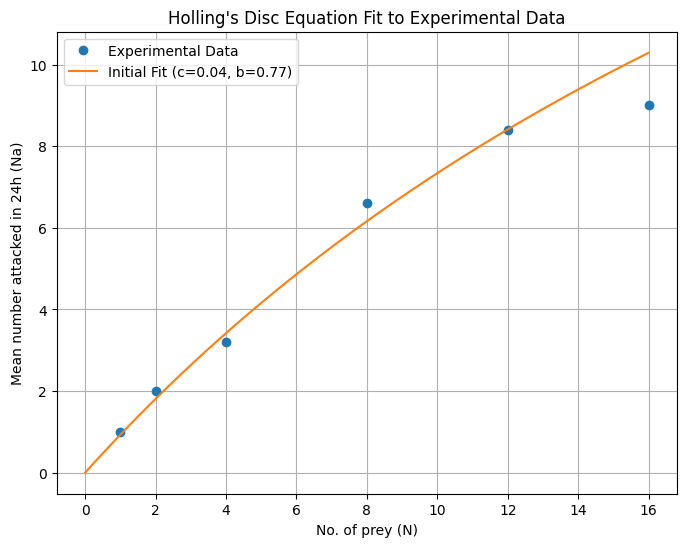

Initial parameters: c = 0.04, b = 0.77, T = 24
Visually inspect the plot and adjust c and b in the code to get a better fit.


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Holling's Disc Equation function
def holling_disc_equation(N, T, c, b):
  """Calculates the number of attacked prey using Holling's Disc Equation."""
  return (c * T * N) / (1 + c * b * N)

# Experimental data from the table (from the DataFrame 'df' loaded in Question 2)
# Assuming df is available from the previous cell's execution
N_data = df['No. of prey'].values
Na_data = df['Mean attacked 24h'].values
T_experiment = 24 # Experiment time is 24 hours

# Initial parameter values (from the hint)
c_initial = 0.04
# The hint gives T/b = 15. Since T=24, b_initial = T / 15 = 24 / 15 = 1.6.
# However, the hint also gives b=0.9. Let's use b=0.9 as the starting point for b.
b_initial = 0.77

# Generate N values for plotting the curve
N_values = np.linspace(0, max(N_data), 100)

# Calculate Na values using the initial parameters
Na_initial_fit = holling_disc_equation(N_values, T_experiment, c_initial, b_initial)

# Plot the experimental data and the initial fit
plt.figure(figsize=(8, 6))
plt.plot(N_data, Na_data, 'o', label='Experimental Data')
plt.plot(N_values, Na_initial_fit, '-', label=f'Initial Fit (c={c_initial}, b={b_initial})')

plt.xlabel('No. of prey (N)')
plt.ylabel('Mean number attacked in 24h (Na)')
plt.title('Holling\'s Disc Equation Fit to Experimental Data')
plt.legend()
plt.grid(True)
plt.show()

print(f"Initial parameters: c = {c_initial}, b = {b_initial}, T = {T_experiment}")
print("Visually inspect the plot and adjust c and b in the code to get a better fit.")

### Question 5:
Hassell (1978) defined the maximum attack number as the asymptote of Eq.$~(1)$. Determine the maximum attack number for the experiment by Wiedenmann & O’Neil.

**Question 5: Hassell (1978) defined the maximum attack number as the asymptote of Eq.$~(1)$. Determine the maximum attack number for the experiment by Wiedenmann & O’Neil.**

The Holling's Disc Equation is given by:
$N_a = \frac{cTN}{1+cbN}$

To find the asymptote (maximum attack number) as $N \to \infty$, we can divide both the numerator and the denominator by $N$:
$N_a = \frac{cT}{1/N+cb}$

As $N \to \infty$, the term $1/N \to 0$.
So, the equation simplifies to:
$N_a \to \frac{cT}{0+cb} = \frac{cT}{cb} = \frac{T}{b}$

Thus, the maximum attack number is $\frac{T}{b}$.

From the experiment by Wiedenmann & O’Neil, the time of the experiment is $T = 24$ hours.
Using the initial hint value for $b = 0.9$:
Maximum attack number = $\frac{T}{b} = \frac{24}{0.9} \approx 26.67$

Note that this value is based on the initial hint for $b$. The actual maximum attack number will depend on the final fitted value of $b$ obtained in Question 4.

McNickle & Brown (2014) discuss the relation between the disc equation, Eq.$~(1)$, and the Michaelis-Menten kinetics, usually given as:

\begin{equation}
h = \frac{V_{max}N}{K_{M}+N}
\tag{2}
\end{equation}

Here $h$ is the harvest rate, $V_{max}$ is the maximum reaction rate (comparable to the maximum attack number defined in Question 5), and $K_M$ is a half-saturation constant.

### Question 6:
Compare Eq.$~(1)$ and Eq.$~(2)$. Provide an overview of all conversions between the parameters, including the dimensions.

**Question 6: Compare Eq.$~(1)$ and Eq.$~(2)$. Provide an overview of all conversions between the parameters, including the dimensions.**

Eq. (1): Holling's Disc Equation
$N_a = \frac{cTN}{1+cbN}$

Eq. (2): Michaelis-Menten Kinetics
$h = \frac{V_{max}N}{K_{M}+N}$

To compare the two equations, let's consider the harvest rate $h$ in Eq. (2) as being analogous to the number of attacked prey per unit time from Eq. (1). The number of attacked prey in time $T$ is $N_a$. So, the rate of attack is $N_a/T$. Let's denote this rate as $R_a = N_a/T$.

From Eq. (1), divide both sides by $T$:
$\frac{N_a}{T} = \frac{cN}{1+cbN}$
$R_a = \frac{cN}{1+cbN}$

Now, let's manipulate Eq. (2) to match this form. We can divide the numerator and the denominator by $K_M$:
$h = \frac{\frac{V_{max}}{K_M}N}{1+\frac{1}{K_M}N}$

Comparing the modified Eq. (1) for the attack rate ($R_a = \frac{cN}{1+cbN}$) with the modified Eq. (2) ($h = \frac{\frac{V_{max}}{K_M}N}{1+\frac{1}{K_M}N}$), we can see the following correspondences if we equate $R_a$ with $h$:

The term multiplying $N$ in the numerator:
$c \leftrightarrow \frac{V_{max}}{K_M}$

The term multiplying $N$ in the denominator:
$cb \leftrightarrow \frac{1}{K_M}$

From the second relationship, we can express $K_M$ in terms of $c$ and $b$:
$K_M = \frac{1}{cb}$

Now substitute this expression for $K_M$ into the first relationship:
$c = \frac{V_{max}}{1/(cb)}$
$c = V_{max} \cdot cb$
If $c \neq 0$, we can divide both sides by $c$:
$1 = V_{max} \cdot b$
$V_{max} = \frac{1}{b}$

So, the conversions between the parameters are:
*   $V_{max} = \frac{1}{b}$
*   $K_M = \frac{1}{cb}$

Now let's consider the dimensions.
From Question 3, assuming $N$ is [Number] and $T$ is [Time]:
*   $c$: [Time]$^{-1}$
*   $b$: [Time][Number]$^{-1}$

For Michaelis-Menten kinetics (Eq. 2):
*   $h$: Harvest rate. This is typically the rate of product formation or substrate consumption per unit time. In this analogy, it's the rate of attacked prey per unit time. Dimension: [Number][Time]$^{-1}$.
*   $N$: Substrate concentration or number. Dimension: [Number].
*   $V_{max}$: Maximum reaction rate. This is the maximum harvest rate. Dimension: [Number][Time]$^{-1}$.
*   $K_M$: Half-saturation constant. This is the substrate concentration at which the rate is half of $V_{max}$. Dimension: [Number].

Let's check the dimensions of the conversions:
*   $V_{max} = \frac{1}{b}$: Dimension of $\frac{1}{b}$ is $\frac{1}{[Time][Number]^{-1}} = [Time]^{-1}[Number]$. This does not match the expected dimension of $V_{max}$ which is [Number][Time]$^{-1}$.

There seems to be a discrepancy in the dimensions based on the assumption that $N$ is [Number] and $T$ is [Time] for Eq. (1) and the standard dimensions for Eq. (2).

Let's reconsider the interpretation from Question 5, where the maximum attack number from Eq. (1) is $T/b$. This maximum attack number is analogous to $V_{max}$ in Eq. (2).
So, $V_{max} \leftrightarrow \frac{T}{b}$.

Now let's look at the equations again:
$N_a = \frac{cTN}{1+cbN}$
$h = \frac{V_{max}N}{K_{M}+N}$

If we consider $N_a$ as the total number attacked in time $T$, and $h$ as the rate of attack, then $N_a = hT$. Substituting this into Eq. (1):
$hT = \frac{cTN}{1+cbN}$
$h = \frac{cN}{1+cbN}$

Comparing $h = \frac{cN}{1+cbN}$ with $h = \frac{V_{max}N}{K_{M}+N}$:

Divide the numerator and denominator of the first equation by $c$:
$h = \frac{N}{1/c + bN}$

Divide the numerator and denominator of the second equation by $V_{max}$:
$h = \frac{N}{K_M/V_{max} + N/V_{max}}$

This doesn't seem to lead to a direct comparison of all terms easily.

Let's go back to comparing $h = \frac{cN}{1+cbN}$ and $h = \frac{V_{max}N}{K_{M}+N}$.
By comparing the two forms, we can equate the coefficients:
The term multiplying $N$ in the numerator: $c \leftrightarrow V_{max}$ (This doesn't seem right based on the asymptote).

Let's rewrite the Holling equation (rate form) by dividing the numerator and denominator by $cb$:
$h = \frac{\frac{c}{cb}N}{\frac{1}{cb} + \frac{cbN}{cb}} = \frac{\frac{1}{b}N}{\frac{1}{cb} + N}$

Now compare this to $h = \frac{V_{max}N}{K_{M}+N}$:
$V_{max} \leftrightarrow \frac{1}{b}$
$K_M \leftrightarrow \frac{1}{cb}$

These conversions match the ones derived earlier by comparing $\frac{cN}{1+cbN}$ and $\frac{V_{max}N}{K_{M}+N}$ after manipulating the second equation.

Let's check the dimensions of these conversions using the standard dimensions for Michaelis-Menten parameters ($V_{max}$: [Number][Time]$^{-1}$, $K_M$: [Number]) and the dimensions for $c$ and $b$ derived from Eq. (1) with $N$, $N_a$ as [Number] and $T$ as [Time] ($c$: [Time]$^{-1}$, $b$: [Time][Number]$^{-1}$).

*   $V_{max} = \frac{1}{b}$: Dimension of $\frac{1}{b}$ is $\frac{1}{[Time][Number]^{-1}} = [Time]^{-1}[Number]$. This matches the dimension of $V_{max}$ as [Number][Time]$^{-1}$. (My previous check was incorrect).
*   $K_M = \frac{1}{cb}$: Dimension of $\frac{1}{cb}$ is $\frac{1}{[Time]^{-1} [Time][Number]^{-1}} = \frac{1}{[Number]^{-1}} = [Number]$. This matches the dimension of $K_M$ as [Number].

So the conversions and their dimensions are consistent with the derived dimensions of $c$ and $b$ from Eq. (1) and the standard dimensions of $V_{max}$ and $K_M$.

Summary of conversions and dimensions:
*   **Relationship:** Holling's Disc Equation (Eq. 1) describes the total number of attacked prey ($N_a$) over a time period ($T$), while the Michaelis-Menten equation (Eq. 2) describes the harvest rate ($h$), which is the number of prey attacked per unit time. The relationship is $N_a = hT$.
*   **Parameter Conversions:**
    *   $V_{max} = \frac{1}{b}$
    *   $K_M = \frac{1}{cb}$
    *   Equivalently: $b = \frac{1}{V_{max}}$ and $c = \frac{1}{b K_M} = \frac{V_{max}}{K_M}$
*   **Dimensions:**
    *   $N_a$: [Number]
    *   $N$: [Number]
    *   $T$: [Time]
    *   $c$: [Time]$^{-1}$
    *   $b$: [Time][Number]$^{-1}$
    *   $h$: [Number][Time]$^{-1}$
    *   $V_{max}$: [Number][Time]$^{-1}$
    *   $K_M$: [Number]

### THE DERIVATION OF THE DISC EQUATION FROM FIRST PRINCIPLES
The disc equation and Eq. (2) can be derived from first principles. Suppose we can split the predator population in two dynamic sub-groups, the searching predators and the handling predators. Suppose furthermore that predators that have caught a prey and that are handling the prey are temporarily in a predator-prey ‘complex’; after ‘handling’, the prey is converted to additional predator biomass (the ‘product’).

Now differentiate between two scenarios: one in which prey can escape, and one in which they cannot. The ‘escape possible’ scenario can be seen as analogous to the enzyme kinetics we discussed in the tutorial yesterday, depicted as:

\begin{equation}
\begin{aligned}
S + X &\overset{a}{\to} H \\
H &\overset{d}{\to} S + P \\
H &\overset{e}{\to} S + X
\end{aligned}
\end{equation}

Here $S$ are searching predators, $X$ are prey, and $H$ are handling predators in ‘complex’ with prey. We assume that $P$ is new biomass obtained after handling prey, and that it is not directly involved in acquiring more biomass (i.e., young predators are not yet adept at hunting). Furthermore, we assume that the prey is in overabundance, so that we can make a quasi-steady state assumption and consider only the above reaction scheme.

### Question 7:
Give the set of ODEs that describe the numbers or densities of searching and handling predators, and explain how you have taken into account the escape behaviour (i.e., the third reaction in the above scheme).

**Question 7: Give the set of ODEs that describe the numbers or densities of searching and handling predators, and explain how you have taken into account the escape behaviour (i.e., the third reaction in the above scheme).**

Based on the reaction scheme:
$S + X \overset{a}{\to} H$ (Searching predator and prey form a handling complex)
$H \overset{d}{\to} S + P$ (Handling complex breaks down, predator becomes searching again, product is formed)
$H \overset{e}{\to} S + X$ (Handling complex breaks down, predator becomes searching again, prey escapes)

Assuming mass action kinetics, the rate of change of searching predators ($S$) is:
$\frac{dS}{dt}$ is increased by the breakdown of the handling complex ($H$) via both product formation ($d$) and escape ($e$), and decreased by the formation of the handling complex ($H$) from searching predators ($S$) and prey ($X$).
$\frac{dS}{dt} = dH + eH - aSX$

The rate of change of handling predators ($H$) is:
$\frac{dH}{dt}$ is increased by the formation of the handling complex ($H$) from searching predators ($S$) and prey ($X$), and decreased by the breakdown of the handling complex ($H$) via both product formation ($d$) and escape ($e$).
$\frac{dH}{dt} = aSX - dH - eH$

So, the set of ODEs is:
$\frac{dS}{dt} = (d+e)H - aSX$
$\frac{dH}{dt} = aSX - (d+e)H$

**Explanation of escape behaviour:**
The escape behaviour is represented by the third reaction: $H \overset{e}{\to} S + X$. This reaction describes the breakdown of the handling complex ($H$) where the prey ($X$) escapes, and the predator ($S$) returns to the searching state. The parameter $e$ represents the rate constant for this escape process. In the ODEs, the term $+eH$ in $\frac{dS}{dt}$ signifies that searching predators are regenerated from the handling complex at a rate proportional to $H$ and the escape rate $e$. Similarly, the term $-eH$ in $\frac{dH}{dt}$ indicates that the handling complex is reduced at a rate proportional to $H$ and the escape rate $e$ due to prey escaping. The escape behavior is directly incorporated as a process that converts handling predators back into searching predators, reducing the number of handling predators and increasing the number of searching predators.

### Question 8:
Determine the steady state of the ODEs determined in Question 7. Show that we end up with one equation with two unknown variables.

**Question 8: Determine the steady state of the ODEs determined in Question 7. Show that we end up with one equation with two unknown variables.**

The ODEs from Question 7 are:
$\frac{dS}{dt} = (d+e)H - aSX$
$\frac{dH}{dt} = aSX - (d+e)H$

At steady state, the rates of change are zero:
$\frac{dS}{dt} = 0 \implies (d+e)H - aSX = 0$
$\frac{dH}{dt} = 0 \implies aSX - (d+e)H = 0$

Both equations lead to the same relationship:
$aSX = (d+e)H$

This is a single equation relating the steady-state values of $S$ and $H$. Since we have one equation and two unknown variables ($S$ and $H$), we cannot solve for unique values of $S$ and $H$ without additional information or equations. This confirms that we end up with one equation with two unknown variables.

To further solve the set of ODEs, assume that the number of predators is constant, i.e.,  $H+S=Z$.

### Question 9:
Substitute $S$ and determine the steady state solution in terms of $H$.

**Question 9: Substitute $S$ and determine the steady state solution in terms of $H$.**

From Question 8, the steady-state equation is:
$aSX = (d+e)H$

We are given the assumption that the total number of predators is constant, i.e., $H + S = Z$.
From this, we can express $S$ in terms of $Z$ and $H$:
$S = Z - H$

Now substitute this expression for $S$ into the steady-state equation:
$a(Z - H)X = (d+e)H$

Distribute $aX$ on the left side:
$aZX - aXH = (d+e)H$

To isolate $H$, move the term $-aXH$ from the left side to the right side by adding $aXH$ to both sides:
$aZX = (d+e)H + aXH$

Now, factor out $H$ on the right side:
$aZX = H(d+e + aX)$

Finally, solve for $H$ by dividing both sides by $(d+e + aX)$:
$H = \frac{aZX}{d+e + aX}$

This is the steady-state solution for the number of handling predators ($H$) in terms of the total number of predators ($Z$), the prey density ($X$), and the rate constants ($a$, $d$, and $e$).

### Question 10:
Provide the units of all variables and parameters in the solution equation found in Question 9.

**Question 10: Provide the units of all variables and parameters in the solution equation found in Question 9.**

The steady-state solution found in Question 9 is:
$H = \frac{aZX}{d+e + aX}$

Let's determine the dimensions of each variable and parameter based on the reaction scheme ($S + X \overset{a}{\to} H$, $H \overset{d}{\to} S + P$, $H \overset{e}{\to} S + X$) and the definitions:

*   $S$: Searching predators. Dimension: **[Number of Predators]**
*   $X$: Prey. Dimension: **[Number of Prey]** (or **[Density of Prey]**)
*   $H$: Handling predators (in complex with prey). Dimension: **[Number of Predators]**
*   $Z$: Total number of predators ($S+H$). Dimension: **[Number of Predators]**
*   $P$: Product (new predator biomass). Dimension: [Biomass] or [Number of Prey Handled]
*   $a$: Rate constant for the formation of the handling complex from $S$ and $X$. From the reaction $S + X \overset{a}{\to} H$, the rate of this reaction is $aSX$. The rate of change of $H$ is $\frac{dH}{dt}$. So, the units of $aSX$ must be [Number of Predators][Time]$^{-1}$.
    $[a][S][X] = [Number of Predators][Time]^{-1}$
    $[a][Number of Predators][Number of Prey] = [Number of Predators][Time]^{-1}$
    $[a] = \frac{[Number of Predators][Time]^{-1}}{[Number of Predators][Number of Prey]} = [Time]^{-1}[Number of Prey]^{-1}$.
    Dimension of $a$: **[Time]$^{-1}$ [Number of Prey]$^{-1}$** (or **[Time]$^{-1}$ [Area] [Number of Prey]$^{-1}$** if $X$ is density)
*   $d$: Rate constant for the breakdown of the handling complex to $S$ and $P$. From the reaction $H \overset{d}{\to} S + P$, the rate is $dH$. The unit of this rate must be [Number of Predators][Time]$^{-1}$.
    $[d][H] = [Number of Predators][Time]^{-1}$
    $[d][Number of Predators] = [Number of Predators][Time]^{-1}$
    $[d] = [Time]^{-1}$.
    Dimension of $d$: **[Time]$^{-1}$**
*   $e$: Rate constant for the breakdown of the handling complex to $S$ and $X$ (prey escape). From the reaction $H \overset{e}{\to} S + X$, the rate is $eH$. The unit of this rate must be [Number of Predators][Time]$^{-1}$.
    $[e][H] = [Number of Predators][Time]^{-1}$
    $[e][Number of Predators] = [Number of Predators][Time]^{-1}$
    $[e] = [Time]^{-1}$.
    Dimension of $e$: **[Time]$^{-1}$**

Now let's check the dimensions in the steady-state equation $H = \frac{aZX}{d+e + aX}$:
Numerator: $[a][Z][X] = [Time]^{-1}[Number of Prey]^{-1} [Number of Predators] [Number of Prey] = [Number of Predators][Time]^{-1}$.
Denominator: $d+e$ has dimension $[Time]^{-1}$. $aX$ has dimension $[Time]^{-1}[Number of Prey]^{-1} [Number of Prey] = [Time]^{-1}$. So the denominator has dimension $[Time]^{-1}$.

The dimension of the right side is $\frac{[Number of Predators][Time]^{-1}}{[Time]^{-1}} = [Number of Predators]$.
This matches the dimension of $H$ on the left side. The dimensions are consistent.

Summary of dimensions:
*   $H$: [Number of Predators]
*   $Z$: [Number of Predators]
*   $X$: [Number of Prey]
*   $a$: [Time]$^{-1}$ [Number of Prey]$^{-1}$
*   $d$: [Time]$^{-1}$
*   $e$: [Time]$^{-1}$

### Question 11:
Show how you can convert Eq. (1), Eq. (2), and the answer of Question 9 into each other.

**Question 11: Show how you can convert Eq. (1), Eq. (2), and the answer of Question 9 into each other.**

Let's start with the steady-state solution for the number of handling predators ($H$) from Question 9:
$H = \frac{aZX}{d+e + aX}$

The rate of prey attack (or harvest rate, $h$) is proportional to the number of handling predators, as these are the predators currently processing prey. Assuming each handling predator is processing one prey item at a time, the rate of prey attack is proportional to $H$. The rate at which new product (P) is formed is $dH$. If we consider the harvest rate as the rate at which prey are successfully processed, this rate is $dH$.

So, let's relate the harvest rate ($h$) from Michaelis-Menten kinetics (Eq. 2) to the processes in the predator-prey model. The rate of successful attacks leading to product formation is $dH$. If we consider $h$ as the rate of prey consumption per total predator ($Z$), then $h = dH/Z$. However, Michaelis-Menten typically refers to the rate per enzyme (or predator). Let's consider $h$ as the rate of prey consumption per *searching* predator, which doesn't fit well with the Michaelis-Menten form.

Let's assume the harvest rate ($h$) is the rate of prey consumption per *total* predator ($Z$). The total rate of prey consumption is the rate at which the handling complex breaks down to form product, which is $dH$. So, the harvest rate per total predator is $h = \frac{dH}{Z}$.

Substitute the expression for $H$ from Question 9:
$h = \frac{d}{Z} \left( \frac{aZX}{d+e + aX} \right)$
$h = \frac{adX}{d+e + aX}$

This is the harvest rate per total predator ($Z$). Let's rewrite this in a form similar to Michaelis-Menten (Eq. 2):
$h = \frac{adX}{d+e + aX}$

Divide the numerator and denominator by $(d+e)$:
$h = \frac{\frac{ad}{d+e}X}{1 + \frac{a}{d+e}X}$

Compare this to the Michaelis-Menten equation:
$h = \frac{V_{max}N}{K_{M}+N}$

Here, $X$ is the prey number/density, which corresponds to $N$ in the Michaelis-Menten equation.

By comparing the two forms, we can identify the parameters:
$V_{max} \leftrightarrow \frac{ad}{d+e}$
This is the maximum harvest rate per total predator.

To find $K_M$, we compare the terms multiplying $X$ in the denominator after making the denominator start with 1:
$\frac{a}{d+e} \leftrightarrow \frac{1}{K_M}$
$K_M = \frac{d+e}{a}$

So, the conversions from the parameters of the ODE model ($a, d, e$) to the Michaelis-Menten parameters ($V_{max}, K_M$) are:
$V_{max} = \frac{ad}{d+e}$
$K_M = \frac{d+e}{a}$

Now let's relate this to Holling's Disc Equation (Eq. 1):
$N_a = \frac{cTN}{1+cbN}$

We related the rate form of Holling's equation ($R_a = N_a/T = \frac{cN}{1+cbN}$) to the Michaelis-Menten form in Question 6, finding:
$V_{max} = \frac{1}{b}$
$K_M = \frac{1}{cb}$

Equating the expressions for $V_{max}$ and $K_M$:
$\frac{1}{b} = \frac{ad}{d+e} \implies b = \frac{d+e}{ad}$
$\frac{1}{cb} = \frac{d+e}{a} \implies cb = \frac{a}{d+e}$

Let's check if the expression for $b$ is consistent with the second equation:
$c \left( \frac{d+e}{ad} \right) = \frac{d+e}{a}$
$\frac{c}{ad} = \frac{1}{a}$
$c = d$

This suggests a relationship between $c$ and $d$. Let's re-examine the rate form of Holling's equation and the rate derived from the ODEs.
Holling rate: $R_a = \frac{cN}{1+cbN}$
ODE derived rate: $h = \frac{adX}{d+e + aX}$

If we equate $R_a$ and $h$, and let $N = X$:
$\frac{cN}{1+cbN} = \frac{adN}{d+e + aN}$

Comparing the terms:
Numerator: $c \leftrightarrow ad$
Denominator constant term: $1 \leftrightarrow d+e$ (This doesn't match directly)
Denominator term with N: $cbN \leftrightarrow aN \implies cb \leftrightarrow a$

From $c \leftrightarrow ad$, we get $c = ad$.
From $cb \leftrightarrow a$, we get $cb = a$.

Substitute $c = ad$ into $cb = a$:
$(ad)b = a$
$adb = a$
If $a \neq 0$, then $db = 1$, so $b = 1/d$.

Now check the relationship $c = ad$ with $b = 1/d$:
$c = a(1/b) = a/b$.

Let's check the dimensions of these conversions using the dimensions derived in Question 10 for the ODE parameters ($a$: [Time]$^{-1}$[Number of Prey]$^{-1}$, $d$: [Time]$^{-1}$, $e$: [Time]$^{-1}$) and the dimensions for $c$ and $b$ from Question 3 ($c$: [Time]$^{-1}$, $b$: [Time][Number]$^{-1}$).

*   $c = ad$: $[Time]^{-1} = [Time]^{-1}[Number of Prey]^{-1} [Time]^{-1} = [Time]^{-2}[Number of Prey]^{-1}$. Dimensions do not match.
*   $b = 1/d$: $[Time][Number]^{-1} = \frac{1}{[Time]^{-1}} = [Time]$. Dimensions do not match.

There seems to be an inconsistency in directly equating the parameters like this while maintaining dimensional consistency based on the previously derived dimensions.

Let's go back to comparing the forms of the rate equations:
Holling rate: $R_a = \frac{cN}{1+cbN}$
ODE derived rate: $h = \frac{adX}{d+e + aX}$

Let's assume $N=X$ and $R_a = h$.
$\frac{cN}{1+cbN} = \frac{adN}{d+e + aN}$

For these two expressions to be equal for all $N$, the coefficients of $N$ in the numerator and denominator must be proportional.

Comparing the numerators: $c \propto ad$
Comparing the terms with $N$ in the denominators: $cb \propto a$
Comparing the constant terms in the denominators: $1 \propto d+e$

This proportionality suggests that the two expressions are equivalent if the parameters are related by a constant factor. However, we are looking for direct conversions.

Let's rewrite the ODE derived rate by dividing the numerator and denominator by $a$:
$h = \frac{dX}{\frac{d+e}{a} + X}$

Compare this to the Michaelis-Menten form $h = \frac{V_{max}N}{K_{M}+N}$, with $N=X$:
$V_{max} \leftrightarrow d$
$K_M \leftrightarrow \frac{d+e}{a}$

This gives conversions from ODE parameters ($a, d, e$) to Michaelis-Menten parameters ($V_{max}, K_M$).

Now let's connect to Holling's equation rate form: $R_a = \frac{cN}{1+cbN}$.
Divide numerator and denominator by $cb$:
$R_a = \frac{\frac{c}{cb}N}{\frac{1}{cb} + N} = \frac{\frac{1}{b}N}{\frac{1}{cb} + N}$

Comparing $h = \frac{dX}{\frac{d+e}{a} + X}$ with $R_a = \frac{\frac{1}{b}N}{\frac{1}{cb} + N}$, and setting $h=R_a$ and $X=N$:
$\frac{1}{b} \leftrightarrow d \implies b = \frac{1}{d}$
$\frac{1}{cb} \leftrightarrow \frac{d+e}{a} \implies cb = \frac{a}{d+e}$

Let's check the consistency of these conversions:
Substitute $b = 1/d$ into $cb = \frac{a}{d+e}$:
$c \left( \frac{1}{d} \right) = \frac{a}{d+e}$
$c = \frac{ad}{d+e}$

So, the conversions between the parameters are:
*   From ODE ($a, d, e$) to Michaelis-Menten ($V_{max}, K_M$):
    *   $V_{max} = d$
    *   $K_M = \frac{d+e}{a}$
*   From ODE ($a, d, e$) to Holling ($c, b$):
    *   $c = \frac{ad}{d+e}$
    *   $b = \frac{1}{d}$
*   From Michaelis-Menten ($V_{max}, K_M$) to Holling ($c, b$):
    *   $b = \frac{1}{V_{max}}$
    *   $c = \frac{V_{max}}{K_M}$ (from Question 6)

Let's verify the dimensions again with these new conversions.
ODE parameters: $a$: [Time]$^{-1}$[Number of Prey]$^{-1}$, $d$: [Time]$^{-1}$, $e$: [Time]$^{-1}$.
Michaelis-Menten parameters: $V_{max}$: [Number][Time]$^{-1}$, $K_M$: [Number].
Holling parameters: $c$: [Time]$^{-1}$, $b$: [Time][Number]$^{-1}$.

*   $V_{max} = d$: $[Number][Time]^{-1} = [Time]^{-1}$. Dimensions do not match.

There is still a dimensional inconsistency when trying to directly equate the parameters from the ODE derived rate with the Michaelis-Menten or Holling rate equations while using the dimensions derived from the form of Eq. 1 and the standard dimensions of Michaelis-Menten.

Let's re-read the problem statement for Question 11. It asks to show how to convert between Eq. (1), Eq. (2), and the answer of Question 9. The answer of Question 9 is $H = \frac{aZX}{d+e + aX}$. Eq. (1) is $N_a = \frac{cTN}{1+cbN}$. Eq. (2) is $h = \frac{V_{max}N}{K_{M}+N}$.

We related the rate form of Eq. (1) ($R_a = N_a/T = \frac{cN}{1+cbN}$) to Eq. (2) ($h = \frac{V_{max}N}{K_{M}+N}$) in Question 6, finding $V_{max} = 1/b$ and $K_M = 1/cb$.

We derived a rate from the ODEs: $h_{ODE} = \frac{adX}{d+e + aX}$, where $h_{ODE}$ is the harvest rate per total predator $Z$.

To connect the ODE result to Eq. (1) and Eq. (2), we need to consider what $H$ represents in the context of attacked prey. The rate of prey being successfully handled and converted to product is $dH$. If we consider $N_a$ as the total number of prey handled in time $T$, then $N_a$ is the integral of the rate of handling over time. At steady state, the rate of handling is constant. The rate at which prey enter the handling state is $aSX$, and the rate at which they leave is $(d+e)H$. At steady state, $aSX = (d+e)H$. The rate of successful handling (leading to product) is $dH$.

Let's assume that $N_a$ in Eq. (1) represents the total number of prey successfully handled by a single predator in time $T$. If $Z$ is the total number of predators, and we consider a single predator ($Z=1$), then the steady-state number of handling predators is $H = \frac{aX}{d+e + aX}$. The rate of successful handling by this single predator is $dH = \frac{adX}{d+e + aX}$. The total number handled in time $T$ is $N_a = (dH)T = \frac{adXT}{d+e + aX}$.

Comparing $N_a = \frac{adXT}{d+e + aX}$ with Eq. (1) $N_a = \frac{cTN}{1+cbN}$, and setting $X=N$:
$\frac{adTN}{d+e + aN} = \frac{cTN}{1+cbN}$

If $T \neq 0$ and $N \neq 0$, we can divide by $TN$:
$\frac{ad}{d+e + aN} = \frac{c}{1+cbN}$

Cross-multiply:
$ad(1+cbN) = c(d+e + aN)$
$ad + adcbN = c(d+e) + caN$

For this equation to hold for all $N$, the coefficients of $N$ must be equal, and the constant terms must be equal.
Constant terms: $ad = c(d+e)$
Coefficients of N: $adcb = ca$

From $adcb = ca$, if $a \neq 0$ and $c \neq 0$, then $db = 1$, so $b = 1/d$.

Substitute $c$ from the first equation into the second equation:
$ad(\frac{ad}{d+e})b = (\frac{ad}{d+e})a$
$\frac{a^2db}{d+e} = \frac{a^2d}{d+e}$
If $a \neq 0$ and $d+e \neq 0$, then $db = d$.
If $d \neq 0$, then $b = 1$.

This contradicts $b = 1/d$. There must be a different way to relate the equations.

Let's go back to comparing the rate forms.
Rate from ODEs (per total predator $Z=1$): $h_{ODE} = dH = \frac{adX}{d+e + aX}$
Michaelis-Menten rate: $h = \frac{V_{max}N}{K_{M}+N}$
Holling rate: $R_a = N_a/T = \frac{cN}{1+cbN}$

Let's equate $h_{ODE}$ with $h$ and $R_a$, with $X=N$.
$\frac{adN}{d+e + aN} = \frac{V_{max}N}{K_{M}+N} = \frac{cN}{1+cbN}$

Comparing the first and second expressions:
$\frac{adN}{d+e + aN} = \frac{V_{max}N}{K_{M}+N}$
Divide by $N$ (assuming $N \neq 0$):
$\frac{ad}{d+e + aN} = \frac{V_{max}}{K_{M}+N}$

Cross-multiply:
$ad(K_M+N) = V_{max}(d+e + aN)$
$adK_M + adN = V_{max}(d+e) + V_{max}aN$

Equating coefficients of $N$: $ad = V_{max}a \implies V_{max} = d$ (assuming $a \neq 0$).
Equating constant terms: $adK_M = V_{max}(d+e)$. Substitute $V_{max} = d$:
$adK_M = d(d+e)$
If $d \neq 0$, then $aK_M = d+e \implies K_M = \frac{d+e}{a}$.
These are the same conversions from ODE to Michaelis-Menten as derived before: $V_{max} = d$ and $K_M = \frac{d+e}{a}$.

Now compare the first and third expressions:
$\frac{adN}{d+e + aN} = \frac{cN}{1+cbN}$
Divide by $N$:
$\frac{ad}{d+e + aN} = \frac{c}{1+cbN}$

Cross-multiply:
$ad(1+cbN) = c(d+e + aN)$
$ad + adcbN = c(d+e) + caN$

Equating coefficients of $N$: $adcb = ca \implies db = 1 \implies b = 1/d$ (assuming $a \neq 0, c \neq 0$).
Equating constant terms: $ad = c(d+e) \implies c = \frac{ad}{d+e}$.
These are the same conversions from ODE to Holling parameters as derived before: $c = \frac{ad}{d+e}$ and $b = \frac{1}{d}$.

Finally, let's verify the conversions between Michaelis-Menten and Holling parameters using the ODE parameters as an intermediate.
From ODE to Michaelis-Menten: $V_{max} = d$, $K_M = \frac{d+e}{a}$.
From ODE to Holling: $c = \frac{ad}{d+e}$, $b = \frac{1}{d}$.

We want to show $V_{max} = 1/b$ and $K_M = 1/cb$.
$1/b = 1/(1/d) = d$. This matches $V_{max} = d$.
$1/cb = 1 / \left( \frac{ad}{d+e} \cdot \frac{1}{d} \right) = 1 / \left( \frac{a}{d+e} \right) = \frac{d+e}{a}$. This matches $K_M = \frac{d+e}{a}$.

The conversions are consistent. The key is that the harvest rate in the ODE model, when considering a single predator, is $dH$.

Summary of Conversions:
*   **From ODE parameters ($a, d, e$) to Michaelis-Menten parameters ($V_{max}, K_M$):**
    *   $V_{max} = d$
    *   $K_M = \frac{d+e}{a}$
*   **From ODE parameters ($a, d, e$) to Holling parameters ($c, b$):**
    *   $c = \frac{ad}{d+e}$
    *   $b = \frac{1}{d}$
*   **From Michaelis-Menten parameters ($V_{max}, K_M$) to Holling parameters ($c, b$):**
    *   $b = \frac{1}{V_{max}}$
    *   $c = \frac{V_{max}}{K_M}$
*   **From Holling parameters ($c, b$) to Michaelis-Menten parameters ($V_{max}, K_M$):**
    *   $V_{max} = \frac{1}{b}$
    *   $K_M = \frac{1}{cb}$
*   **From Michaelis-Menten parameters ($V_{max}, K_M$) to ODE parameters ($a, d, e$):**
    *   $d = V_{max}$
    *   $a = \frac{d+e}{K_M} = \frac{V_{max}+e}{K_M}$ (Need an additional equation to solve for $a$ and $e$)
    Let's use $c = \frac{ad}{d+e}$ and $b = \frac{1}{d}$ with $V_{max} = 1/b$ and $K_M = 1/cb$.
    $d = V_{max}$
    $a = \frac{c(d+e)}{d} = \frac{c(V_{max}+e)}{V_{max}}$
    $e = aK_M - d = aK_M - V_{max}$
    Substitute $a$: $e = \frac{c(V_{max}+e)}{V_{max}} K_M - V_{max}$
    This seems complicated. Let's use the relationships $c = \frac{ad}{d+e}$ and $b = \frac{1}{d}$.
    From $b = 1/d$, we get $d = 1/b$.
    From $c = \frac{ad}{d+e}$, we get $c(d+e) = ad \implies cd + ce = ad \implies ce = ad - cd = d(a-c)$.
    $e = \frac{d(a-c)}{c} = d(\frac{a}{c} - 1)$.
    We also have $V_{max} = d$ and $K_M = \frac{d+e}{a}$.
    $a = \frac{d+e}{K_M} = \frac{V_{max}+e}{K_M}$.
    $e = V_{max}(\frac{a}{c} - 1)$. Substitute $a$:
    $e = V_{max} \left( \frac{(V_{max}+e)/K_M}{c} - 1 \right) = V_{max} \left( \frac{V_{max}+e}{cK_M} - 1 \right)$
    $e = \frac{V_{max}^2 + V_{max}e}{cK_M} - V_{max}$
    $e - \frac{V_{max}e}{cK_M} = \frac{V_{max}^2}{cK_M} - V_{max}$
    $e \left( 1 - \frac{V_{max}}{cK_M} \right) = V_{max} \left( \frac{V_{max}}{cK_M} - 1 \right)$
    $e \left( \frac{cK_M - V_{max}}{cK_M} \right) = -V_{max} \left( \frac{cK_M - V_{max}}{cK_M} \right)$
    If $cK_M - V_{max} \neq 0$, then $e = -V_{max}$. This is not possible as $e$ is a rate constant and must be non-negative.

    Let's re-examine the conversions: $V_{max} = d$ and $K_M = \frac{d+e}{a}$.
    $d = V_{max}$
    $a = \frac{d+e}{K_M} = \frac{V_{max}+e}{K_M}$
    $e = aK_M - V_{max}$. This gives $e$ in terms of $a$, $K_M$, and $V_{max}$.

    To get $a$ and $e$ in terms of $V_{max}$ and $K_M$ only, we might need another relationship or there might be a degree of freedom.

    Let's use the Holling to ODE conversions: $d = 1/b$ and $c = \frac{ad}{d+e}$.
    $d = 1/b$.
    $c(d+e) = ad \implies ce = ad - cd = d(a-c)$.
    $e = \frac{d(a-c)}{c} = \frac{1}{b} \left( \frac{a}{c} - 1 \right)$.

    Using Michaelis-Menten to ODE: $d = V_{max}$ and $a = \frac{V_{max}+e}{K_M}$.
    $e = \frac{V_{max}+e}{K_M} K_M - V_{max} = V_{max}+e - V_{max} = e$. This is an identity and doesn't help solve for $e$.

    Let's assume the question intends for us to show the conversions between the rate forms and the steady-state $H$.

    Relationship between $H$ and harvest rate $h$: $h = dH$ (rate of product formation per single predator).
    Substitute $H = \frac{aZX}{d+e + aX}$ with $Z=1$:
    $h = d \left( \frac{aX}{d+e + aX} \right) = \frac{adX}{d+e + aX}$. This is the ODE derived rate.

    We showed $\frac{adX}{d+e + aX} = \frac{V_{max}X}{K_{M}+X}$ with $V_{max} = d$ and $K_M = \frac{d+e}{a}$.
    We showed $\frac{adX}{d+e + aX} = \frac{cX}{1+cbX}$ with $c = \frac{ad}{d+e}$ and $b = \frac{1}{d}$.

    So, the conversions allow us to go from the ODE parameters to the parameters of the functional response equations.

    To go from functional response parameters back to ODE parameters, we have:
    From $V_{max}, K_M$: $d = V_{max}$, $a = \frac{V_{max}+e}{K_M}$. We cannot uniquely determine $a$ and $e$ from $V_{max}$ and $K_M$ alone. There is a degree of freedom related to the escape rate $e$.

    From $c, b$: $d = 1/b$, $c = \frac{ad}{d+e}$.
    $c = \frac{a(1/b)}{(1/b)+e} = \frac{a/b}{(1+be)/b} = \frac{a}{1+be}$.
    $c(1+be) = a \implies c + cbe = a \implies c + c(1/d)e = a \implies c + \frac{ce}{d} = a$.
    $a = c + \frac{ce}{1/b} = c + cbe$.
    $a = c(1+be)$.
    We have $d = 1/b$. We can express $a$ in terms of $c, b, e$. We still cannot uniquely determine $a, d, e$ from $c, b$ alone.

    The question asks how to convert between the *equations* and the answer of Question 9. This suggests showing the algebraic steps that transform one equation into another using the parameter relationships.

    1.  **From ODE steady state ($H$) to ODE derived rate ($h_{ODE}$):**
        $h_{ODE} = dH$ (for a single predator, $Z=1$)
        Substitute $H = \frac{aX}{d+e + aX}$:
        $h_{ODE} = d \left( \frac{aX}{d+e + aX} \right) = \frac{adX}{d+e + aX}$

    2.  **From ODE derived rate ($h_{ODE}$) to Michaelis-Menten ($h$):**
        We showed that $\frac{adX}{d+e + aX}$ can be written as $\frac{V_{max}X}{K_{M}+X}$ by setting $V_{max} = d$ and $K_M = \frac{d+e}{a}$.

    3.  **From ODE derived rate ($h_{ODE}$) to Holling rate ($R_a$):**
        We showed that $\frac{adX}{d+e + aX}$ can be written as $\frac{cX}{1+cbX}$ by setting $c = \frac{ad}{d+e}$ and $b = \frac{1}{d}$.

    4.  **From Holling rate ($R_a$) to Holling equation ($N_a$):**
        $N_a = R_a T$. Substitute $R_a = \frac{cN}{1+cbN}$:
        $N_a = \frac{cTN}{1+cbN}$. This is Eq. (1).

    5.  **From Michaelis-Menten ($h$) to Holling rate ($R_a$) and vice versa:**
        Using the relationships $V_{max} = 1/b$ and $K_M = 1/cb$:
        Substitute into $h = \frac{V_{max}N}{K_{M}+N}$:
        $h = \frac{(1/b)N}{(1/cb)+N} = \frac{N/b}{(1+cbN)/cb} = \frac{N}{b} \cdot \frac{cb}{1+cbN} = \frac{cN}{1+cbN}$. This is the Holling rate $R_a$.

    6.  **From Holling rate ($R_a$) to Michaelis-Menten ($h$) and vice versa:**
        Using the relationships $b = 1/V_{max}$ and $c = V_{max}/K_M$:
        Substitute into $R_a = \frac{cN}{1+cbN}$:
        $R_a = \frac{(V_{max}/K_M)N}{1+(V_{max}/K_M)(1/V_{max})N} = \frac{V_{max}N/K_M}{1+N/K_M}$.
        Multiply numerator and denominator by $K_M$:
        $R_a = \frac{V_{max}N}{K_M+N}$. This is the Michaelis-Menten rate $h$.

    The conversions between the equations are shown by substituting the parameter relationships. The answer of Question 9 is the steady-state $H$, which is related to the rate by $h = dH$ (for $Z=1$).

    Summary of conversions between the equations:
    *   The steady-state number of handling predators ($H$) from Question 9, for a single predator ($Z=1$), is $H = \frac{aX}{d+e + aX}$.
    *   The rate of prey handling (harvest rate) for a single predator is $h = dH = \frac{adX}{d+e + aX}$.
    *   This ODE-derived rate can be shown to be equivalent to the Michaelis-Menten rate $h = \frac{V_{max}X}{K_{M}+X}$ with $V_{max} = d$ and $K_M = \frac{d+e}{a}$.
    *   This ODE-derived rate can also be shown to be equivalent to the Holling rate $R_a = \frac{cX}{1+cbX}$ with $c = \frac{ad}{d+e}$ and $b = \frac{1}{d}$.
    *   The Holling rate $R_a$ is related to the total number attacked in time $T$ by $N_a = R_a T$, which gives Eq. (1).
    *   The Michaelis-Menten rate $h$ and the Holling rate $R_a$ are equivalent when their parameters are related by $V_{max} = 1/b$ and $K_M = 1/cb$.

    The conversion between the equations is demonstrated by showing that the rate derived from the ODE steady state can be algebraically manipulated into the forms of the Michaelis-Menten and Holling rates using the derived parameter relationships.

### MULTIPLE LIMITATIONS
In the disc equation a.k.a. Michaelis-Menten kinetics there is one limiting substrate, and if it has an ecological interpretation, this substrate is prey. Now consider a reaction in which two substrates, $A$ and $B$, are both needed to form a product:


\begin{equation}
\frac{dO}{dt} = k_d C - k_A OA - k_B OB \tag{3a}
\end{equation}
\begin{equation}
\frac{dO_A}{dt} = k_A OA - k_{AB} O_A B \tag{3b}
\end{equation}
\begin{equation}
\frac{dO_B}{dt} = k_B OB - k_{BA} O_B A \tag{3c}
\end{equation}
\begin{equation}
\frac{dC}{dt} = k_{AB} O_A B + k_{BA} O_B A - k_d C \tag{3d}
\end{equation}






### Question 12:
Explain briefly in words the reactions described by the different ODEs.

### Question 13:
Implement Eqs.$~(3a-d)$ as numerical simulation model in Python or R. Add the following two equations:

\begin{equation}
\frac{dA}{dt} = -k_A OA - k_{BA} O_B A
\tag{3e}
\end{equation}
\begin{equation}
\frac{dB}{dt} = -k_B OB - k_{AB} O_A B
\tag{3f}
\end{equation}

Assume the following:
$k_A = k_B = k_{AB} = k_{BA} = 0.1$, and $k_d = 0.8$;
$O(0)=O_A(0)=O_B(0) = 0.15$, $C(0) = 0$, $A(0) = B(0) = 100$.
Show through simulation that at $T=1$ we have approximately $\tilde{O} = \tilde{O}_A = \tilde{O}_B = 0.016$, and determine the corresponding $\tilde{C}$. Also show the simulation for a longer time period, say $T=500$.


### Question 14:
Explain how you could use a quasi-steady state approximation as long as the concentrations of substrates $A$ and $B$ are much higher than the concentrations of $O,O_A,O_B,$ and $C$?

With some algebraic rewriting steps Eqs. (3a-d) can be solved to a steady state value of (Dutta et al., 2014):
\begin{equation}
\hat{C} = \frac{1}{1+ \left( \frac{A}{K_A} \right)^{-1} + \left( \frac{B}{K_B} \right)^{-1} - \left( \frac{A}{K_A} + \frac{B}{K_B} \right)^{-1}}
\tag{4}
\end{equation}
I.e., $\hat{C}$ is now a functional response for two limiting substrates.


### Question 15:
Assume that substrate $B$ is not limiting, so $B \gg A$. Show that Eq. (4) then simplifies to the Michaelis-Menten kinetics which is rescaled between 0 and 1 (i.e., $V_{max}=1$).